In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [2]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!kaggle -v

Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
     |████████████████████████████████| 1.4MB 6.0MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 58 kB 2.9 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72859 sha256=dac0552bfe6026b322e2b8368c846caee7345155edd501789c8df46517655848
  Stored in directory: /root/.cache/pip/wheels/01/3e/ff/77407ebac3ef71a79b9166a8382aecf88415a0bcbe3c095a01
Successfully built kaggle
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.6/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.6/dist-packages/kaggle/api/kaggle_api_extended.py", line 149, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zedsrz","key":"aa55a70cd8aabfb6a3ba84b50c9c939e"}'}

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
# !kaggle datasets list
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
!kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge

 98% 280M/285M [00:04<00:00, 80.1MB/s]
100% 285M/285M [00:04<00:00, 68.2MB/s]


In [8]:
!unzip '/content/challenges-in-representation-learning-facial-expression-recognition-challenge.zip'

Archive:  /content/challenges-in-representation-learning-facial-expression-recognition-challenge.zip
  inflating: example_submission.csv  
  inflating: fer2013.tar.gz          
  inflating: icml_face_data.csv      
  inflating: test.csv                
  inflating: train.csv               


In [0]:
# !$mkdir '/content/drive/My Drive/fer_images'

In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Activation, Input, Lambda, Dense, Dropout, Convolution2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

fer_data=pd.read_csv('/content/train.csv',delimiter=',')
X = []
y = []

def save_fer_img():

  for index,row in tqdm(fer_data.iterrows()):
    pixels=np.asarray(list(row['pixels'].split(' ')),dtype=np.uint8)
    img=pixels.reshape((48,48))
    X.append(img)
    y.append(row['emotion'])
    # pathname=os.path.join('/content/drive/My Drive/emotion_data/',str(index)+'_'+str(row['emotion'])+'.jpg')
    # cv2.imwrite(pathname,img)
    # plt.imsave(pathname, img, cmap='gray')
  # print('image saved ias {}'.format(pathname))
save_fer_img()

X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)
np.save('/content/drive/My Drive/emotion_data/X.npy', X)
np.save('/content/drive/My Drive/emotion_data/y.npy', y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



(28709, 48, 48)
(28709,)


0


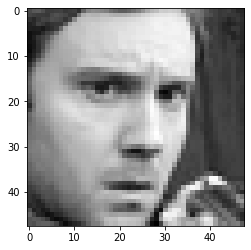

In [12]:
print(y[0])
plt.imshow(X[0], cmap='gray')

In [10]:
from google.colab import drive
# drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
import tensorflow as tf

num_classes = 6
img_rows, img_cols = 56, 46
batch_size = 16

# train_data_dir = './datasets/train'
# validation_data_dir = './datasets/validation'

train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 30,
        shear_range = 0.3,
        zoom_range = 0.3,
        width_shift_range = 0.4,
        horizontal_flip = True,
        fill_mode = 'nearest'
        )

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = tf.keras.preprocessing.image.NumpyArrayIterator(X_train.reshape(-1,48,48,1), 
                                                                  y_train.reshape(-1,1), 
                                                                 train_datagen,batch_size=32, 
                                                                  shuffle=True)

test_generator = tf.keras.preprocessing.image.NumpyArrayIterator(X_test.reshape(-1,48,48,1), 
                                                                 y_test.reshape(-1,1), 
                                                                 validation_datagen,
                                                                  batch_size=32, 
                                                                  shuffle=True)

# train_generator = train_datagen.flow_from_directory(
#         train_data_dir,
#         color_mode = 'grayscale',
#         target_size = (img_rows, img_cols),
#         batch_size = batch_size,
#         class_mode = 'categorical',
#         shuffle = True
#         )

# validation_generator = validation_datagen.flow_from_directory(
#         validation_data_dir,
#         color_mode = 'grayscale',
#         target_size = (img_rows, img_cols),
#         batch_size = batch_size,
#         class_mode = 'categorical',
#         shuffle = True
#         )

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import ELU
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense

num_classes = 6
img_rows, img_cols = 56, 46
batch_size = 16

model = Sequential()

model.add(Conv2D(32, (3, 3), padding = 'same', kernel_initializer="he_normal",
                 input_shape = (img_rows, img_cols, 1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding = "same", kernel_initializer="he_normal", 
                 input_shape = (img_rows, img_cols, 1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #2: second CONV => RELU => CONV => RELU => POOL
# layer set
model.add(Conv2D(64, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #3: third CONV => RELU => CONV => RELU => POOL
# layer set
model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #4: third CONV => RELU => CONV => RELU => POOL
# layer set
model.add(Conv2D(256, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #: third CONV => RELU => CONV => RELU => POOL
# layer set
model.add(Conv2D(512, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #5: first set of FC => RELU layers
model.add(Flatten())
model.add(Dense(64, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block #6: second set of FC => RELU layers
model.add(Dense(64, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block #7: softmax classifier
model.add(Dense(num_classes, kernel_initializer="he_normal"))
model.add(Activation("softmax"))

#print(model.summary())
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

                     
checkpoint = ModelCheckpoint("/content/drive/My Drive/emotion_data/emotion_little_vgg_3.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 1, min_delta = 0.0001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr=0.01),
              metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 56, 46, 32)        320       
_________________________________________________________________
activation_13 (Activation)   (None, 56, 46, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 56, 46, 32)        128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 56, 46, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 56, 46, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 56, 46, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 23, 32)       

In [22]:
nb_train_samples = 28273
nb_validation_samples = 3534
epochs = 100

history = model.fit_generator(
    train_generator,
    
    epochs = epochs,
    callbacks = callbacks,
    validation_data = test_generator,
    )

Epoch 1/100
718/718 [==============================] - ETA: 0s - loss: 1903.2852 - accuracy: 0.1547
Epoch 00001: val_loss did not improve from 172.38039
718/718 [==============================] - 33s 46ms/step - loss: 1903.2852 - accuracy: 0.1547 - val_loss: 790.1548 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 2/100
717/718 [============================>.] - ETA: 0s - loss: 2139.3811 - accuracy: 0.1547
Epoch 00002: val_loss did not improve from 172.38039
718/718 [==============================] - 33s 45ms/step - loss: 2139.7363 - accuracy: 0.1547 - val_loss: 853.9965 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 3/100
717/718 [============================>.] - ETA: 0s - loss: 2355.8081 - accuracy: 0.1568
Epoch 00003: val_loss did not improve from 172.38039
718/718 [==============================] - 33s 46ms/step - loss: 2356.2400 - accuracy: 0.1570 - val_loss: 1044.3292 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 4/100
718/718 [==============================] - ETA: 0s - loss: 2575